# Chapter 19 Classification Models and Evaluation
# Use Case: Credit Risk - Identifying Bad Credit Risks
# ===========================================

Dataset: Credit risk https://datahub.io/machine-learning/credit-g
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

In [2]:
df = pd.read_csv("../data/credit-g.csv")

Data Wrangling ... one hot encodings, type conversion

In [3]:
# list categorical columns...
cat_cols =['checking_status', 'purpose', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans','housing','job','own_telephone']

# One hot encoding of catagorical variables...
df[cat_cols].astype("category")

# one hot encodings
one_hot_encodings = pd.get_dummies(df[cat_cols])

#Combine Dfs
df = pd.concat([df, one_hot_encodings], axis=1)

#remove categorical columns...
df = df.drop(columns=cat_cols)

#Data wrangling..... get types and bad values sorted out

# Remove characters in numeric columns (note that the data type was set, by the open_csv function, to object, 
# so we first convert to string before running the replace function (which can only be fun on str types)
df['foreign_worker'] = df['foreign_worker'].str.replace('yes', '1')
df['foreign_worker'] = df['foreign_worker'].str.replace('no', '0')
df['class'] = df['class'].str.replace('good', '0')
df['class'] = df['class'].str.replace('bad', '1')

# Convert to numerics so we can use in ML... Make sure type is good. We change the type from str to numeric here, and any 
#df['Installs'] = pd.to_numeric(df['Installs'], errors ='coerce').fillna(0).astype('int')
df['foreign_worker'] = pd.to_numeric(df['foreign_worker'], errors ='coerce').fillna(0).astype('int')
df['class'] = pd.to_numeric(df['class'], errors ='coerce').fillna(0).astype('int')
df['duration'] = pd.to_numeric(df['duration'], errors ='coerce').fillna(0).astype('int')
df['installment_commitment'] = pd.to_numeric(df['installment_commitment'], errors ='coerce').fillna(0).astype('int')
df['residence_since'] = pd.to_numeric(df['residence_since'], errors ='coerce').fillna(0).astype('int')
df['age'] = pd.to_numeric(df['age'], errors ='coerce').fillna(0).astype('int')
df['num_dependents'] = pd.to_numeric(df['num_dependents'], errors ='coerce').fillna(0).astype('int')

df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,class,checking_status_0<=X<200,...,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Classification Learners

We test a number of classification learners side by side, comparing accuracy of each  

Get the sklearn packages we will need for our clasification problem

In [4]:
import numpy as np
import time 

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

Now build classification models to identify bad credits...

In [5]:
# Define X and y variables
cols  = list(df.columns)
cols.remove('class')

# Contains only numerics
X = df[cols]
y = df['class']

#Test and train set    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [6]:
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

# #Func to wrap up running these selected classification learners...
# # Note the optional parameter run_only_RandomForestClassifier, which will allow us to just run the rf...
# def run_rf_classification_models(X_train: pd.DataFrame, X_test: pd.DataFrame, 
#                             y_train: pd.DataFrame, y_test: pd.DataFrame) -> list:

#     sclr = StandardScaler()
#     sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

#     X_train = sclr.fit_transform(X_train) # scale both sets:
#     X_test = sclr.fit_transform(X_test)

#     rf = RandomForestClassifier(max_depth=5,random_state=0)
#     rf.fit(X_train,y_train)
#     y_train_hat =rf.predict(X_train)
#     y_test_hat = rf.predict(X_test)

#     # Print score
#     print(type(rf))        
#     print(f"Accuracy train: {rf.score(X_train,y_train):.4f}, test: ",
#       f"{rf.score(X_test,y_test):.4f}")
#     print(f"Precision train: {precision_score(y_train, y_train_hat, average=None)[0]:.4f}, test: ",
#       f"{precision_score(y_test,y_test_hat, average=None)[0]:.4f}")
#     print(f"Recall train: {recall_score(y_train, y_train_hat, average=None)[0]:.4f}, test: ",
#       f"{recall_score(y_test,y_test_hat, average=None)[0]:.4f}")
#     print(f"F1 train: {f1_score(y_train, y_train_hat, average=None)[1]:.4f}, test: ",
#       f"{f1_score(y_test,y_test_hat, average=None)[1]:.4f}")
#     #print(f1_score(y_test, y_test_hat, average=None))


#     #Print confusion matrix...
#     cf_matrix = confusion_matrix(y_test, y_test_hat, labels=[0, 1]) 
#     cf_matrix_norm = cf_matrix.astype('float') # / cf_matrix.sum(axis=1)[:, np.newaxis]

#     ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
#     ax.set_title('Confusion Matrix\n\n');
#     ax.set_xlabel('\nPredicted Values')
#     ax.set_ylabel('Actual Values ');
#     plt.show()

# #run rf classifier
# run_rf_classification_models(X_train, X_test, y_train, y_test)

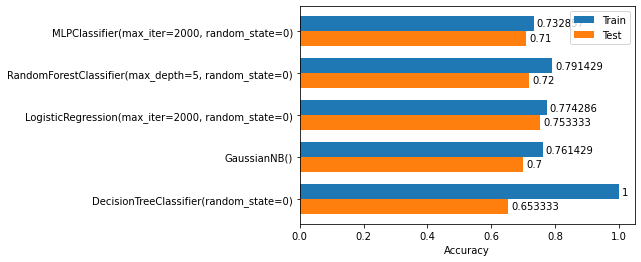

In [49]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dtc = DecisionTreeClassifier(random_state=0)
gnb = GaussianNB()
lr = LogisticRegression(max_iter=2000,random_state=0)
rf = RandomForestClassifier(max_depth=5,random_state=0)
mlp = MLPClassifier(max_iter=2000,random_state=0)
all_models = [dtc, gnb, lr, rf, mlp]

def model_compare(all_models,X_train,y_train,X_test,y_test):
    mdl_trn_scr = []
    mdl_tst_scr = []

    for mdl in all_models:
        mdl.fit(X_train,y_train)
        mdl_trn_scr.append(mdl.score(X_train,y_train))
        mdl_tst_scr.append(mdl.score(X_test,y_test))

    x = np.arange(len(all_models))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(x + width/2, mdl_trn_scr, width, label='Train')
    rects2 = ax.barh(x - width/2, mdl_tst_scr, width, label='Test')

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    ax.set_xlabel('Accuracy')
    ax.set_yticks(x, all_models)
    ax.legend()
    plt.show()

model_compare(all_models,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy train: 0.7743, test:  0.7200
Precision train: 0.8146, test:  0.7946
Recall train: 0.8806, test:  0.8641
F1 train: 0.5753, test:  0.5647


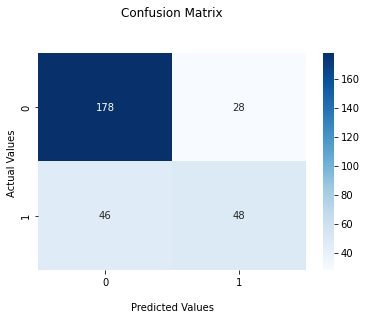

In [50]:
#Func to wrap up running these selected classification learners...
# Note the optional parameter run_only_RandomForestClassifier, which will allow us to just run the rf...
def classification_metrics(mdl, X_train, y_train, X_test, y_test):

    y_train_hat = mdl.predict(X_train)
    y_test_hat = mdl.predict(X_test)

    # Print score
    print(type(mdl))        
    print(f"Accuracy train: {mdl.score(X_train,y_train):.4f}, test: ",
      f"{rf.score(X_test,y_test):.4f}")
    print(f"Precision train: {precision_score(y_train, y_train_hat, average=None)[0]:.4f}, test: ",
      f"{precision_score(y_test,y_test_hat, average=None)[0]:.4f}")
    print(f"Recall train: {recall_score(y_train, y_train_hat, average=None)[0]:.4f}, test: ",
      f"{recall_score(y_test,y_test_hat, average=None)[0]:.4f}")
    print(f"F1 train: {f1_score(y_train, y_train_hat, average=None)[1]:.4f}, test: ",
      f"{f1_score(y_test,y_test_hat, average=None)[1]:.4f}")

def cnfsn_mtrx(mdl, X_train, y_train, X_test, y_test):

    y_train_hat = mdl.predict(X_train)
    y_test_hat = mdl.predict(X_test)


    #Print confusion matrix...
    cf_matrix = confusion_matrix(y_test, y_test_hat, labels=[0, 1]) 
    cf_matrix_norm = cf_matrix.astype('float') # / cf_matrix.sum(axis=1)[:, np.newaxis]

    ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    
mdl = all_models[2]
classification_metrics(mdl, X_train, y_train, X_test, y_test)
cnfsn_mtrx(mdl, X_train, y_train, X_test, y_test)

## A Problem: Imbalanced dataset

Imbalances in datasets for classification problems is a big issue. We generally need to balance the dataset 50%/50% before training and testing. This can be done by up-sampling the minority class, or downsampling the majoirty class.

Imbalanced dataset....
0    700
1    300
Name: class, dtype: int64


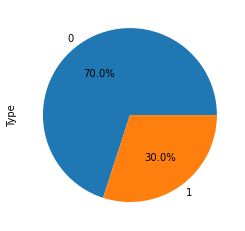

In [51]:

#Pie chart of imbalances wrapped as a func as we will use it a few times..
def pie_of_imbalance(df: pd.DataFrame, class_col: str = 'class'):
    print('Imbalanced dataset....')
    print(df[class_col].value_counts())
    df.groupby(class_col).size().plot(kind='pie', y = 'class', label = "Type",  autopct='%1.1f%%')
    
#run func
pie_of_imbalance(df)

Upsampling ...creating new data points to balance the classes so as our models are not biased. Simply resample the bad credits (the minority class) to get us a balanced dataset

NOTE: First we need to create our test and train sets, and then we can upsample from our training set. This is to keep the training set in sample and the testing set strictly out of sample (ie our learner does not see any of the test samples until we run the test)

### Upsampling using resampling

Up-sampling using Resample

In [52]:
from sklearn.utils import resample

#Split first to avoid data-snooping
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Create up-sampled data set for minority class
# note that n_samples= the number of samples the imbalance represents.
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                        y_train[y_train == 1],
                                        n_samples=(X_train[y_train == 0].shape[0]-X_train[y_train == 1].shape[0]),
                                        random_state=None)

#Combine train with upsampled
X_upsampled = X_train.append(X_upsampled)
y_upsampled = y_train.append(y_upsampled)

Lets check everyting is in balance now

Imbalanced dataset....
1    491
0    491
Name: class, dtype: int64


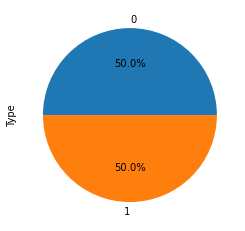

In [53]:
#get pie of the current imbalance
temp = pd.concat([X_upsampled, y_upsampled], axis=1)
pie_of_imbalance(temp)

In [54]:
#Run our function....
mdl.fit(X_upsampled, y_upsampled)
classification_metrics(mdl,X_upsampled, y_upsampled, X_test, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy train: 0.7780, test:  0.7633
Precision train: 0.7886, test:  0.8297
Recall train: 0.7597, test:  0.7225
F1 train: 0.7820, test:  0.5742


F1s for the different learners have changed, some improved and some not.
We can try SMOTE for upsampling now, a more sophisticated approach...

### SMOTE for upsampling

In [55]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

#How many samples do we need to balance?
idx = np.random.choice(X_train.shape[0], size=X_train[y_train == 0].shape[0]-X_train[y_train == 1].shape[0], replace=False)

# Generate SMOTE samples and use this to train
upsampler_smote = SMOTE()
X_upsampled_smote, y_upsampled_smote = upsampler_smote.fit_resample(X_train, y_train)

Lets examine the distribution of SMOTE datapoints

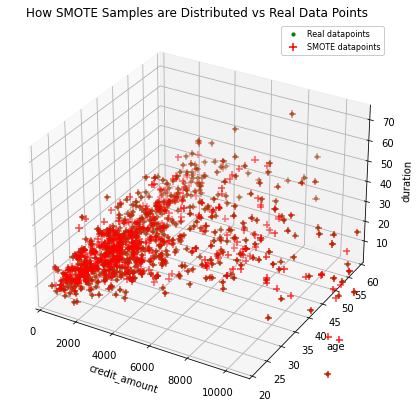

In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['credit_amount'],X_train['age'], X_train['duration'], marker="o", s=10, c='green', label='Real datapoints')
ax.scatter(X_upsampled_smote['credit_amount'],X_upsampled_smote['age'], X_upsampled_smote['duration'], marker="+", s=50, c='red', label='SMOTE datapoints')

# set axes range
plt.xlim(0, 11000)
plt.ylim(20, 60)

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('duration')

plt.title('How SMOTE Samples are Distributed vs Real Data Points')
plt.legend(loc=1,framealpha=1, fontsize=8)
plt.show()

Imbalanced dataset....
1    491
0    491
Name: class, dtype: int64


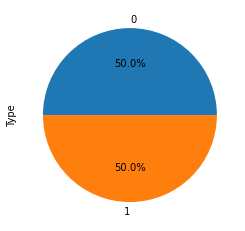

In [57]:
#get pie of the current imbalance
temp = pd.concat([X_upsampled_smote, y_upsampled_smote], axis=1)
pie_of_imbalance(temp)

In [58]:
#Run our function....
mdl.fit(X_upsampled_smote, y_upsampled_smote)
classification_metrics(mdl,X_upsampled_smote, y_upsampled_smote, X_test, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy train: 0.8605, test:  0.7633
Precision train: 0.8365, test:  0.7900
Recall train: 0.8961, test:  0.8278
F1 train: 0.8553, test:  0.5233


### Downsampling

In [59]:
from imblearn.under_sampling import RandomUnderSampler 

#Split first to avoid data-snooping
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Randomly downsample rows in the majority class
rus = RandomUnderSampler(random_state=42)
X_downsampled, y_downsampled = rus.fit_resample(X_train, y_train)

Imbalanced dataset....
0    207
1    207
Name: class, dtype: int64


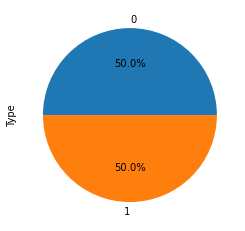

In [60]:
#get pie of the current imbalance
temp = pd.concat([X_downsampled, y_downsampled], axis=1)
pie_of_imbalance(temp)

In [61]:
#Run our function....
mdl.fit(X_downsampled, y_downsampled)
classification_metrics(mdl,X_downsampled, y_downsampled, X_test, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy train: 0.8043, test:  0.7533
Precision train: 0.8029, test:  0.8462
Recall train: 0.8068, test:  0.6377
F1 train: 0.8039, test:  0.5823


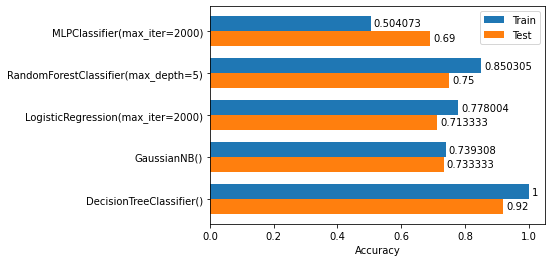

In [63]:
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
lr = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier(max_depth=5)
mlp = MLPClassifier(max_iter=2000)
all_models = [dtc, gnb, lr, rf, mlp]

def model_compare(all_models,X_train,y_train,X_test,y_test):
    mdl_trn_scr = []
    mdl_tst_scr = []

    for mdl in all_models:
        mdl.fit(X_train,y_train)
        mdl_trn_scr.append(mdl.score(X_train,y_train))
        mdl_tst_scr.append(mdl.score(X_test,y_test))

    x = np.arange(len(all_models))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(x + width/2, mdl_trn_scr, width, label='Train')
    rects2 = ax.barh(x - width/2, mdl_tst_scr, width, label='Test')

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    ax.set_xlabel('Accuracy')
    ax.set_yticks(x, all_models)
    ax.legend()
    plt.show()

# for mdl in all_models:
#     mdl.fit(X_upsampled,y_upsampled)
#     mdl_trn_scr.append(mdl.score(X_upsampled_smote,y_upsampled_smote))
#     mdl_tst_scr.append(mdl.score(X_test,y_test))

#for i in range(len(all_models)):
#    print(all_models[i],mdl_trn_scr[i],mdl_tst_scr[i])

model_compare(all_models,X_upsampled,y_upsampled,X_test,y_test)